In [20]:
import pandas as pd 

df = pd.read_csv("https://github.com/rfordatascience/tidytuesday/raw/master/data/2021/2021-02-09/lifetime_wealth.csv")
df

# Reading in data manually 

lifetime_earn = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/lifetime_earn.csv')
student_debt = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/student_debt.csv')
retirement = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/retirement.csv')
home_owner = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/home_owner.csv')
race_wealth = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/race_wealth.csv')
income_time = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/income_time.csv')
income_limits = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/income_limits.csv')
income_aggregate = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/income_aggregate.csv')
income_distribution = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/income_distribution.csv')
income_mean = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/income_mean.csv')

In [21]:
student_debt.head()
# every 3 years from 1989 until 2016 
# race (white, black, hispanic)
# loan debt amount 
# loan debt percentage

,year,race,loan_debt,loan_debt_pct
0,2016,White,11108.410,0.336751
1,2016,Black,14224.770,0.418359
2,2016,Hispanic,7493.999,0.218969
3,2013,White,8363.605,0.284556
4,2013,Black,10302.660,0.412277


In [22]:
income_distribution[['year','race','income_mean']].head()
distinct_race = income_distribution['race'].unique()
print(distinct_race)

# Replace race names
income_distribution['race'].replace({
    'White Alone': 'White',
    'White Alone, Not Hispanic': 'White',
    'Black Alone or in Combination': 'Black',
    'Black Alone': 'Black',
    'Hispanic (Any Race)': 'Hispanic'
}, inplace=True)

income_distribution

['All Races' 'White Alone' 'White Alone, Not Hispanic'
 'Black Alone or in Combination' 'Black Alone'
 'Asian Alone or in Combination' 'Asian Alone' 'Hispanic (Any Race)']


,year,race,number,income_median,income_med_moe,income_mean,income_mean_moe,income_bracket,income_distribution
0,2019,All Races,128451000.0,68703,904,98088.0,1042.0,"Under $15,000",9.1
1,2019,All Races,128451000.0,68703,904,98088.0,1042.0,"$15,000 to $24,999",8.0
2,2019,All Races,128451000.0,68703,904,98088.0,1042.0,"$25,000 to $34,999",8.3
3,2019,All Races,128451000.0,68703,904,98088.0,1042.0,"$35,000 to $49,999",11.7
4,2019,All Races,128451000.0,68703,904,98088.0,1042.0,"$50,000 to $74,999",16.5
...,...,...,...,...,...,...,...,...,...
2911,1972,Hispanic,2655000.0,42073,1352,48359.0,1352.0,"$50,000 to $74,999",22.1
2912,1972,Hispanic,2655000.0,42073,1352,48359.0,1352.0,"$75,000 to $99,999",9.5
2913,1972,Hispanic,2655000.0,42073,1352,48359.0,1352.0,"$100,000 to $149,999",4.8
2914,1972,Hispanic,2655000.0,42073,1352,48359.0,1352.0,"$150,000 to $199,999",0.9


In [23]:
home_owner
# every year from 1976 until 2016 
# race (white, black, hispanic)
# homeowner percentage 

,year,race,home_owner_pct
0,1976,White,0.677538
1,1976,Black,0.442382
2,1976,Hispanic,0.427069
3,1977,White,0.675531
4,1977,Black,0.441229
...,...,...,...
118,2015,Black,0.423000
119,2015,Hispanic,0.456000
120,2016,White,0.682000
121,2016,Black,0.416000


# 1998 Education Attainment Data


In [24]:
# Opening excel file
excel_path = "/Users/junsik/Documents/GitHub/JunSik_Projects/Education Attainment and Home Ownership by Race/1998.xlsx"

# Read the Excel file into a DataFrame, skipping the first 3 rows and setting the header from the 4th row
df = pd.read_excel(excel_path)

# Drop the first 10 rows from the DataFrame
df = df.iloc[11:]

# Filtering columns I want 
df_filtered = df.iloc[:, [0, 8, 10, 12]]

# Rename columns
column_mapping = {
    "Unnamed: 0": "race",
    "Unnamed: 8": "White",
    "Unnamed: 10": "Black or African American",
    "Unnamed: 12": "Hispanic or Latino ethnicity"
}

df_filtered.rename(columns=column_mapping, inplace=True)

# Saving total percent of population 
total_percent_pop = df_filtered.iloc[3, 1:].astype(float)

# Replace values in row 11, TOTAL with values from the 'total' variable
df_filtered.iloc[0, 1:] = total_percent_pop.values

# Define the educational attainment categories
edu_categories = [
    "Less than a high school diploma ",
    "High school graduates, no college",
    "Less than a bachelor’s degree1",
    "Some college, no degree",
    "Associate degree",
    "Bachelor's degree and higher"
]

# Iterate through the categories and update the DataFrame
for i, edu_category in enumerate(edu_categories, start=1):
    # Saving percent of population 
    edu_percent_pop = df_filtered.iloc[i * 8 + 3, 1:].astype(float)
    
    # Replace values for the category
    df_filtered.iloc[i, 1:] = edu_percent_pop.values

# Drop unnecessary rows
df_filtered = df_filtered.iloc[:7]

# Rename row names
df_filtered["race"] = [
    "TOTAL",
    "Less than a high school diploma ",
    "High school graduates, no college",
    "Less than a bachelor’s degree1",
    "Some college, no degree",
    "Associate degree",
    "College graduates"
]

# Set the index to "race" column
df_filtered.set_index("race", inplace=True)

# Drop less than a bachelor's degree1
df_filtered = df_filtered[df_filtered.index != "Less than a bachelor’s degree1"]

# Drop the 'TOTAL' row
df_filtered = df_filtered[df_filtered.index != "TOTAL"]

# Transpose the DataFrame
df_filtered_transposed = df_filtered.transpose()

# Add a new column for the year
df_filtered_transposed["year"] = 1998

# Add a new column with values 1,2,3,4 
df_filtered_transposed["index"] = [1,2,3]

# make index column a new column 
df_filtered_transposed['race'] = df_filtered_transposed.index

# Set the new_index column as the index
df_filtered_transposed.reset_index(inplace=True)

# Assuming df is your DataFrame
df_filtered_transposed.drop(df_filtered_transposed.columns[0], axis=1, inplace=True)

# Dropping index column 
df_filtered_transposed.drop(columns=['index'], inplace=True)

# Resetting index 
df_filtered_transposed.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
edu_1998 = df_filtered_transposed

# Saving all White, Black, Hispanic Values into appropriate categories 
white = edu_1998[edu_1998['race']=='White']
black = edu_1998[edu_1998['race'] == "Black"]
hispanic = edu_1998[edu_1998['race'] == "Hispanic"]

# Define the desired order of columns
column_order = ['race','year', 'Less than a high school diploma ', 'High school graduates, no college', 
                 'Some college, no degree', 'Associate degree', 'College graduates']

# Reorder the columns in the DataFrame
edu_1998 = edu_1998[column_order]
edu_1998.reset_index(drop=True, inplace=True)

# Reset the column name and remove the name attribute
edu_1998.columns.name = None

# Set the data type of 'Bachelor's degree and higher' column
edu_1998["Less than a high school diploma "] = edu_1998["Less than a high school diploma "].astype(float)

# Renaming College graduates to Bachelor's degree and higher 
edu_1998.rename(columns={'College graduates': "Bachelor's degree and higher"}, inplace=True)

edu_1998

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/746276201.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,1998,43.1,64.3,71.2,78.9,79.8
1,Black or African American,1998,40.0,70.4,78.0,83.4,84.7
2,Hispanic or Latino ethnicity,1998,58.7,74.4,79.7,84.0,83.4


# 2004 Education Attainment Data


In [25]:
# Opening excel file
excel_path = "/Users/junsik/Documents/GitHub/JunSik_Projects/Education Attainment and Home Ownership by Race/2004.xlsx"
df = pd.read_excel(excel_path)

# Drop the first 10 rows from the DataFrame
df = df.iloc[16:]

# Filtering columns I want 
df_filtered = df.iloc[:, [0, 2, 4, 8, 10, 12]]

# Rename columns
column_mapping = {
    "Unnamed: 0": "race",
    "Unnamed: 2": "Less than a high school diploma ",
    "Unnamed: 4": "High school graduates, no college",
    "Unnamed: 8": "Some college, no degree",
    "Unnamed: 10": "Associate degree",
    "Unnamed: 12": "Bachelor's degree and higher"
}

df_filtered.rename(columns=column_mapping, inplace=True)

# Add a new column for the year
df_filtered["year"] = 2004

# Saving total percent of population 
# total_percent_pop = df_filtered.iloc[3, 1:].astype(float)

# Replace values in row 11, TOTAL with values from the 'total' variable
# df_filtered.iloc[0, 1:] = total_percent_pop.values

# Drop the next 23 rows after 'TOTAL'
df_filtered1 = df_filtered.drop(df_filtered.index[1:24])

# Saving White educational attainment 
white = df_filtered1.iloc[4, 1:].astype(float)

# Replace values for correct White values 
df_filtered1.iloc[1, 1:] = white.values

# Drop the next 7 rows
df_filtered2 = df_filtered1.drop(df_filtered1.index[2:9])

# Saving Black educational attainment 
black = df_filtered2.iloc[5, 1:].astype(float)

# Replace values for correct Black values 
df_filtered2.iloc[2, 1:] = black.values

# Drop the next 7 rows
df_filtered3 = df_filtered2.drop(df_filtered2.index[3:18])

# Saving Hispanic educational attainment 
hispanic = df_filtered3.iloc[6, 1:].astype(float)

# Replace values for correct Hispanic values 
df_filtered3.iloc[3, 1:] = hispanic.values

# Drop all other rows
edu_2004 = df_filtered3.drop(df_filtered3.index[4:])
edu_2004 = edu_2004.drop(edu_2004.index[0])
edu_2004.reset_index(drop=True, inplace=True)

# Define the desired order of columns
column_order = ['race','year', 'Less than a high school diploma ', 'High school graduates, no college', 
                 'Some college, no degree', 'Associate degree', "Bachelor's degree and higher"]

# Reorder the columns in the DataFrame
edu_2004 = edu_2004[column_order]
edu_2004.reset_index(drop=True, inplace=True)

# Reset the index after dropping rows
edu_2004.reset_index(drop=True, inplace=True)

edu_2004

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/1078810017.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)
/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/1078810017.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = 2004


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,2004,46.0,62.4,69.7,76.6,77.5
1,Black or African American,2004,39.6,67.6,73.9,77.4,82.9
2,Hispanic or Latino ethnicity,2004,62.3,74.0,79.1,79.8,82.1


# 2007 Education Attainment Data

In [26]:
# Opening excel file
excel_path = "/Users/junsik/Documents/GitHub/JunSik_Projects/Education Attainment and Home Ownership by Race/2007.xlsx"

# Read the Excel file into a DataFrame, skipping the first 3 rows and setting the header from the 4th row
df = pd.read_excel(excel_path)

# Drop the first 13 rows from the DataFrame
df = df.iloc[13:]

# Filtering columns I want 
df_filtered = df.iloc[:, [0, 2, 4, 8, 10, 12]]

# Rename columns
column_mapping = {
    "Unnamed: 0": "race",
    "Unnamed: 2": "Less than a high school diploma ",
    "Unnamed: 4": "High school graduates, no college",
    "Unnamed: 8": "Some college, no degree",
    "Unnamed: 10": "Associate degree",
    "Unnamed: 12": "Bachelor's degree and higher"
}

df_filtered.rename(columns=column_mapping, inplace=True)

# Add a new column for the year
df_filtered["year"] = 2007

# Saving total percent of population 
total_percent_pop = df_filtered.iloc[3, 1:].astype(float)

# Replace values in row 11, TOTAL with values from the 'total' variable
df_filtered.iloc[0, 1:] = total_percent_pop.values

# Drop the next 23 rows after 'TOTAL'
df_filtered1 = df_filtered.drop(df_filtered.index[1:24])

# Saving White educational attainment 
white = df_filtered1.iloc[4, 1:].astype(float)

# Replace values for correct White values 
df_filtered1.iloc[1, 1:] = white.values

# Drop the next 7 rows
df_filtered2 = df_filtered1.drop(df_filtered1.index[2:9])

# Saving Black educational attainment 
black = df_filtered2.iloc[5, 1:].astype(float)

# Replace values for correct Black values 
df_filtered2.iloc[2, 1:] = black.values

# Drop the next 7 rows
df_filtered3 = df_filtered2.drop(df_filtered2.index[3:18])

# Saving Hispanic educational attainment 
hispanic = df_filtered3.iloc[6, 1:].astype(float)

# Replace values for correct Hispanic values 
df_filtered3.iloc[3, 1:] = hispanic.values

# Drop all other rows
edu_2007 = df_filtered3.drop(df_filtered3.index[4:])
edu_2007 = edu_2007.drop(edu_2007.index[0])

# Define the desired order of columns
column_order = ['race','year', 'Less than a high school diploma ', 'High school graduates, no college', 
                 'Some college, no degree', 'Associate degree', "Bachelor's degree and higher"]

# Reorder the columns in the DataFrame
edu_2007 = edu_2007[column_order]
edu_2007.reset_index(drop=True, inplace=True)

edu_2007


/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/1531344153.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)
/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/1531344153.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = 2007


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,2007,47.9,62.3,69.0,76.1,77.4
1,Black or African American,2007,39.1,65.4,74.4,77.6,83.0
2,Hispanic or Latino ethnicity,2007,62.6,74.3,78.4,80.7,82.2


# 2010 Education Attainment Data

In [27]:
# Replace 'your_file.xlsx' with the actual path to your Excel file
excel_path = "/Users/junsik/Documents/GitHub/JunSik_Projects/Education Attainment and Home Ownership by Race/2010.xlsx"

# Read the Excel file into a DataFrame, skipping the first 3 rows and setting the header from the 4th row
df = pd.read_excel(excel_path)

# Drop the first 10 rows from the DataFrame
df = df.iloc[13:]

# Filtering columns I want 
df_filtered = df.iloc[:, [0, 2, 4, 8, 10, 12]]

# Rename columns
column_mapping = {
    "Unnamed: 0": "race",
    "Unnamed: 2": "Less than a high school diploma ",
    "Unnamed: 4": "High school graduates, no college",
    "Unnamed: 8": "Some college, no degree",
    "Unnamed: 10": "Associate degree",
    "Unnamed: 12": "Bachelor's degree and higher"
}

df_filtered.rename(columns=column_mapping, inplace=True)

# Add a new column for the year
df_filtered["year"] = 2010

# Saving total percent of population 
total_percent_pop = df_filtered.iloc[3, 1:].astype(float)

# Replace values in row 11, TOTAL with values from the 'total' variable
df_filtered.iloc[0, 1:] = total_percent_pop.values

# Drop the next 23 rows after 'TOTAL'
df_filtered1 = df_filtered.drop(df_filtered.index[1:24])

# Saving White educational attainment 
white = df_filtered1.iloc[4, 1:].astype(float)

# Replace values for correct White values 
df_filtered1.iloc[1, 1:] = white.values

# Drop the next 7 rows
df_filtered2 = df_filtered1.drop(df_filtered1.index[2:9])

# Saving Black educational attainment 
black = df_filtered2.iloc[5, 1:].astype(float)

# Replace values for correct Black values 
df_filtered2.iloc[2, 1:] = black.values

# Drop the next 7 rows
df_filtered3 = df_filtered2.drop(df_filtered2.index[3:18])

# Saving Hispanic educational attainment 
hispanic = df_filtered3.iloc[6, 1:].astype(float)

# Replace values for correct Hispanic values 
df_filtered3.iloc[3, 1:] = hispanic.values

# Drop all other rows
edu_2010 = df_filtered3.drop(df_filtered3.index[4:])
edu_2010 = edu_2010.drop(edu_2010.index[0])

# Define the desired order of columns
column_order = ['race','year', 'Less than a high school diploma ', 'High school graduates, no college', 
                 'Some college, no degree', 'Associate degree', "Bachelor's degree and higher"]

# Reorder the columns in the DataFrame
edu_2010 = edu_2010[column_order]
edu_2010.reset_index(drop=True, inplace=True)

edu_2010


/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/1241326446.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)
/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/1241326446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = 2010


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,2010,47.7,61.2,67.4,74.8,76.5
1,Black or African American,2010,38.8,63.8,72.4,75.9,79.5
2,Hispanic or Latino ethnicity,2010,61.9,73.9,77.2,79.0,81.7


# 2013 Education Attainment Data

In [28]:
# Replace 'your_file.xlsx' with the actual path to your Excel file
excel_path = "/Users/junsik/Documents/GitHub/JunSik_Projects/Education Attainment and Home Ownership by Race/2013.xlsx"

# Read the Excel file into a DataFrame, skipping the first 3 rows and setting the header from the 4th row
df = pd.read_excel(excel_path)

# Drop the first 10 rows from the DataFrame
df = df.iloc[12:]

# Filtering columns I want 
df_filtered = df.iloc[:, [0, 2, 4, 8, 10, 12]]

# Rename columns
column_mapping = {
    "Unnamed: 0": "race",
    "Unnamed: 2": "Less than a high school diploma ",
    "Unnamed: 4": "High school graduates, no college",
    "Unnamed: 8": "Some college, no degree",
    "Unnamed: 10": "Associate degree",
    "Unnamed: 12": "Bachelor's degree and higher"
}

df_filtered.rename(columns=column_mapping, inplace=True)

# Add a new column for the year
df_filtered["year"] = 2013

# Move "Year" column to be the second column after "Race"
columns = list(df_filtered.columns)
columns = [columns[0]] + ['year'] + columns[1:6]

df_filtered = df_filtered[columns]

# Saving total percent of population 
total_percent_pop = df_filtered.iloc[3, 1:].astype(float)

# Replace values in row 11, TOTAL with values from the 'total' variable
df_filtered.iloc[0, 1:] = total_percent_pop.values

# Drop the next 23 rows after 'TOTAL'
df_filtered1 = df_filtered.drop(df_filtered.index[1:24])

# Saving White educational attainment 
white = df_filtered1.iloc[4, 1:].astype(float)

# Replace values for correct White values 
df_filtered1.iloc[1, 1:] = white.values

# Drop the next 7 rows
df_filtered2 = df_filtered1.drop(df_filtered1.index[2:9])

# Saving Black educational attainment 
black = df_filtered2.iloc[5, 1:].astype(float)

# Replace values for correct Black values 
df_filtered2.iloc[2, 1:] = black.values

# Drop the next 7 rows
df_filtered3 = df_filtered2.drop(df_filtered2.index[3:18])

# Saving Hispanic educational attainment 
hispanic = df_filtered3.iloc[6, 1:].astype(float)

# Replace values for correct Hispanic values 
df_filtered3.iloc[3, 1:] = hispanic.values

# Drop all other rows
edu_2013 = df_filtered3.drop(df_filtered3.index[4:])
edu_2013 = edu_2013.drop(edu_2013.index[0])

# Define the desired order of columns
column_order = ['race','year', 'Less than a high school diploma ', 'High school graduates, no college', 
                 'Some college, no degree', 'Associate degree', "Bachelor's degree and higher"]

# Reorder the columns in the DataFrame
edu_2013 = edu_2013[column_order]
edu_2013.reset_index(drop=True, inplace=True)

edu_2013


/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/385023190.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)
/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/385023190.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = 2013


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,2013,46.3,58.3,64.0,71.9,75.0
1,Black or African American,2013,38.2,59.6,69.8,73.6,78.6
2,Hispanic or Latino ethnicity,2013,60.6,69.8,74.4,76.6,80.1


# 2016 Education Attainment Data 

In [29]:
# Replace 'your_file.xlsx' with the actual path to your Excel file
excel_path = "/Users/junsik/Documents/GitHub/JunSik_Projects/Education Attainment and Home Ownership by Race/2016.xlsx"

# Read the Excel file into a DataFrame, skipping the first 3 rows and setting the header from the 4th row
df = pd.read_excel(excel_path)

# Drop the first 10 rows from the DataFrame
df = df.iloc[15:]

# Filtering columns I want 
df_filtered = df.iloc[:, [0, 1, 2, 4, 5, 7]]

# Rename columns
column_mapping = {
    "Unnamed: 0": "race",
    "Unnamed: 1": "Less than a high school diploma ",
    "Unnamed: 2": "High school graduates, no college",
    "Unnamed: 4": "Some college, no degree",
    "Unnamed: 5": "Associate degree",
    "Unnamed: 7": "Bachelor's degree and higher",
}

df_filtered.rename(columns=column_mapping, inplace=True)

# Add a new column for the year
df_filtered["year"] = 2016

# Saving total percent of population 
total_percent_pop = df_filtered.iloc[3, 1:].astype(float)

# Replace values in row 11, TOTAL with values from the 'total' variable
df_filtered.iloc[0, 1:] = total_percent_pop.values

# Drop the next 23 rows after 'TOTAL'
df_filtered1 = df_filtered.drop(df_filtered.index[1:24])

# Saving White educational attainment 
white = df_filtered1.iloc[4, 1:].astype(float)

# Replace values for correct White values 
df_filtered1.iloc[1, 1:] = white.values

# Drop the next 7 rows
df_filtered2 = df_filtered1.drop(df_filtered1.index[2:9])

# Saving Black educational attainment 
black = df_filtered2.iloc[5, 1:].astype(float)

# Replace values for correct Black values 
df_filtered2.iloc[2, 1:] = black.values

# Drop the next 7 rows
df_filtered3 = df_filtered2.drop(df_filtered2.index[3:37])

# Saving Hispanic educational attainment 
hispanic = df_filtered3.iloc[6, 1:].astype(float)

# Replace values for correct Hispanic values 
df_filtered3.iloc[3, 1:] = hispanic.values

# Drop all other rows
edu_2016 = df_filtered3.drop(df_filtered3.index[4:])
edu_2016 = edu_2016.drop(edu_2016.index[0])

# Define the desired order of columns
column_order = ['race','year', 'Less than a high school diploma ', 'High school graduates, no college', 
                 'Some college, no degree', 'Associate degree', "Bachelor's degree and higher"]

# Reorder the columns in the DataFrame
edu_2016 = edu_2016[column_order]
edu_2016.reset_index(drop=True, inplace=True)

edu_2016

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/3702816303.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)
/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_10295/3702816303.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = 2016


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,2016,47.2,56.9,62.8,69.9,73.5
1,Black or African American,2016,37.8,59.2,67.4,73.4,77.5
2,Hispanic or Latino ethnicity,2016,59.0,68.9,73.9,76.6,79.2


In [30]:
# Assuming edu_1998, edu_2004, edu_2007, edu_2010, edu_2013, and edu_2016 are your individual DataFrames

# List of DataFrames
edu_dfs = [edu_1998, edu_2004, edu_2007, edu_2010, edu_2013, edu_2016]

# Reset index for each DataFrame
for df in edu_dfs:
    df.reset_index(drop=True, inplace=True)

# Concatenate DataFrames vertically with consistent indices
edu = pd.concat(edu_dfs, ignore_index=True)

# Replace race names
edu['race'].replace({'Black or African American': 'Black', 'Hispanic or Latino ethnicity': 'Hispanic'}, inplace=True)

# Display the resulting DataFrame
edu


,race,year,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,White,1998,43.1,64.3,71.2,78.9,79.8
1,Black,1998,40.0,70.4,78.0,83.4,84.7
2,Hispanic,1998,58.7,74.4,79.7,84.0,83.4
3,White,2004,46.0,62.4,69.7,76.6,77.5
4,Black,2004,39.6,67.6,73.9,77.4,82.9
5,Hispanic,2004,62.3,74.0,79.1,79.8,82.1
6,White,2007,47.9,62.3,69.0,76.1,77.4
7,Black,2007,39.1,65.4,74.4,77.6,83.0
8,Hispanic,2007,62.6,74.3,78.4,80.7,82.2
9,White,2010,47.7,61.2,67.4,74.8,76.5


In [31]:
# Merge tables on 'year' and 'race' variables
merged_data = pd.merge(student_debt, income_distribution, on=['year', 'race'])
merged_data = pd.merge(merged_data, home_owner, on=['year', 'race'])
merged_data = pd.merge(merged_data, edu, on=['year', 'race'])

# Display the resulting DataFrame
merged_data

,year,race,loan_debt,loan_debt_pct,number,income_median,income_med_moe,income_mean,income_mean_moe,income_bracket,income_distribution,home_owner_pct,Less than a high school diploma,"High school graduates, no college","Some college, no degree",Associate degree,Bachelor's degree and higher
0,2016,White,11108.410,0.336751,99400000.0,65901,585,91988.0,936.0,"Under $15,000",8.9,0.68200,47.2,56.9,62.8,69.9,73.5
1,2016,White,11108.410,0.336751,99400000.0,65901,585,91988.0,936.0,"$15,000 to $24,999",8.6,0.68200,47.2,56.9,62.8,69.9,73.5
2,2016,White,11108.410,0.336751,99400000.0,65901,585,91988.0,936.0,"$25,000 to $34,999",8.9,0.68200,47.2,56.9,62.8,69.9,73.5
3,2016,White,11108.410,0.336751,99400000.0,65901,585,91988.0,936.0,"$35,000 to $49,999",12.3,0.68200,47.2,56.9,62.8,69.9,73.5
4,2016,White,11108.410,0.336751,99400000.0,65901,585,91988.0,936.0,"$50,000 to $74,999",16.8,0.68200,47.2,56.9,62.8,69.9,73.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1998,Hispanic,1436.579,0.102280,9060000.0,44535,1412,60177.0,2105.0,"$50,000 to $74,999",18.1,0.44901,58.7,74.4,79.7,84.0,83.4
257,1998,Hispanic,1436.579,0.102280,9060000.0,44535,1412,60177.0,2105.0,"$75,000 to $99,999",11.3,0.44901,58.7,74.4,79.7,84.0,83.4
258,1998,Hispanic,1436.579,0.102280,9060000.0,44535,1412,60177.0,2105.0,"$100,000 to $149,999",9.3,0.44901,58.7,74.4,79.7,84.0,83.4
259,1998,Hispanic,1436.579,0.102280,9060000.0,44535,1412,60177.0,2105.0,"$150,000 to $199,999",3.2,0.44901,58.7,74.4,79.7,84.0,83.4


# Data Visualization 
## Education Attainment By Race over years

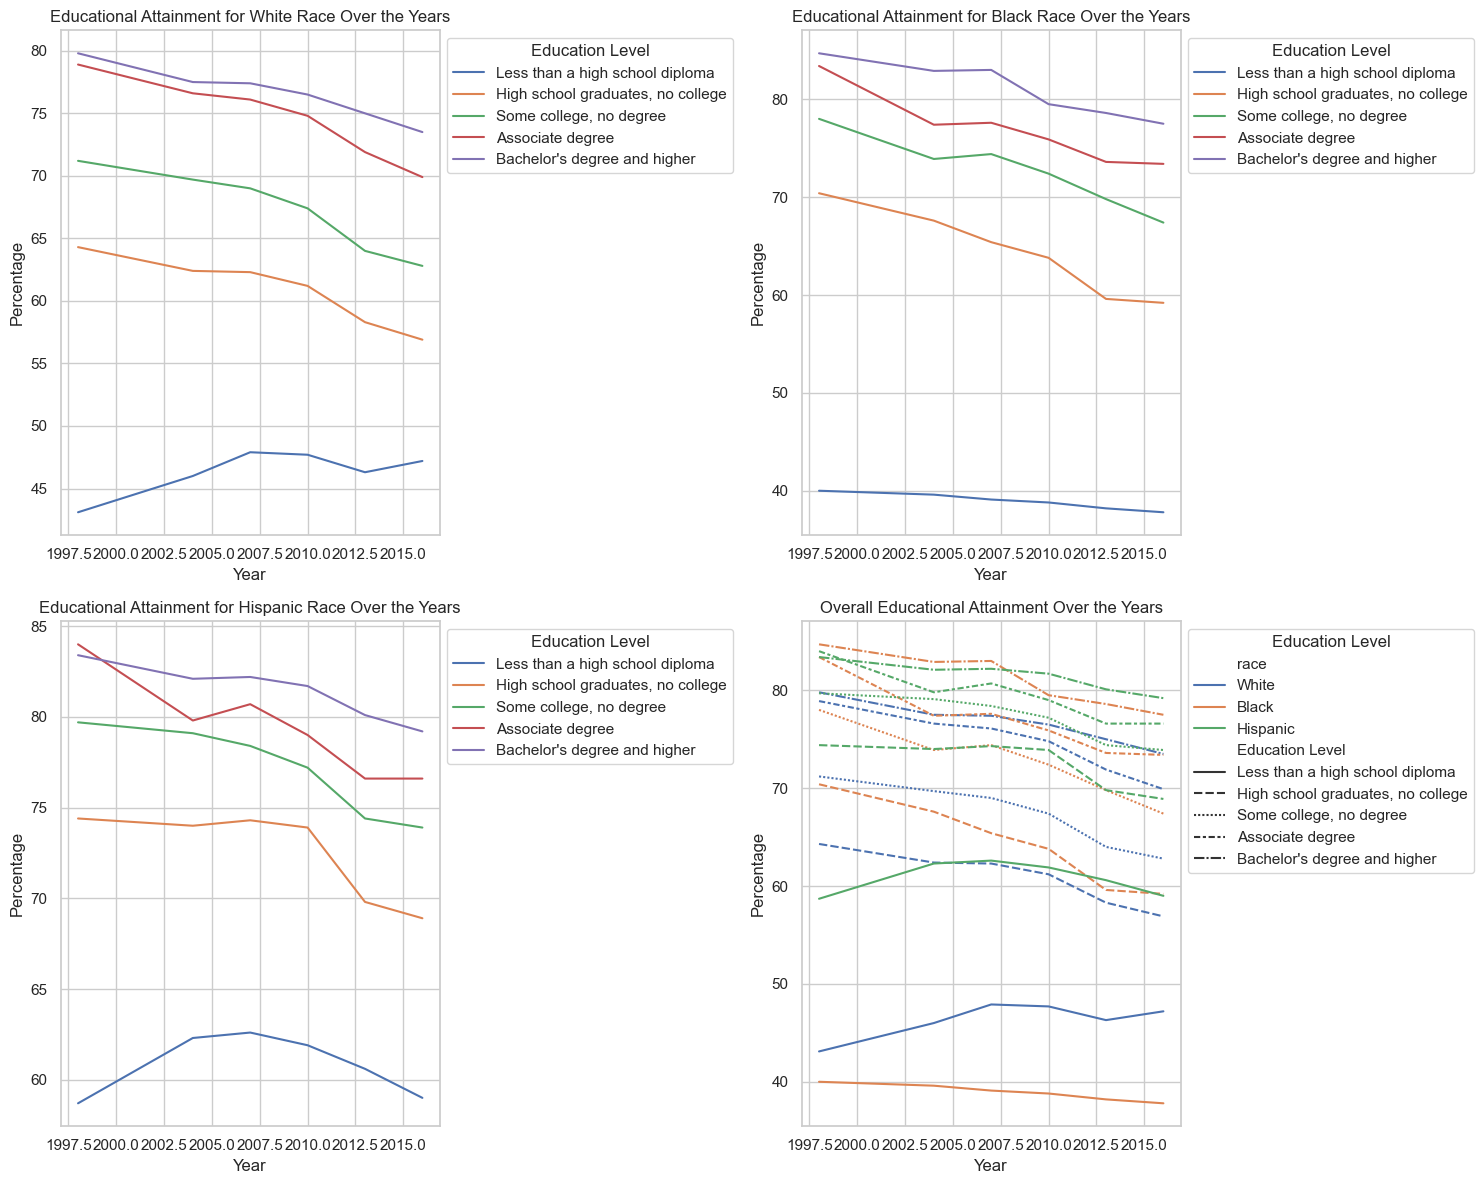

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for White race education level
white_edu = edu[edu['race'] == 'White']
white_edu_long = white_edu.melt(id_vars=['race', 'year'], var_name='Education Level', value_name='Percentage')
sns.lineplot(x='year', y='Percentage', hue='Education Level', data=white_edu_long, ax=axes[0, 0])
axes[0, 0].set_title('Educational Attainment for White Race Over the Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='Education Level', bbox_to_anchor=(1, 1))

# Plot for Black race education level
black_edu = edu[edu['race'] == 'Black']
black_edu_long = black_edu.melt(id_vars=['race', 'year'], var_name='Education Level', value_name='Percentage')
sns.lineplot(x='year', y='Percentage', hue='Education Level', data=black_edu_long, ax=axes[0, 1])
axes[0, 1].set_title('Educational Attainment for Black Race Over the Years')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Education Level', bbox_to_anchor=(1, 1))

# Plot for Hispanic race education level
hispanic_edu = edu[edu['race'] == 'Hispanic']
hispanic_edu_long = hispanic_edu.melt(id_vars=['race', 'year'], var_name='Education Level', value_name='Percentage')
sns.lineplot(x='year', y='Percentage', hue='Education Level', data=hispanic_edu_long, ax=axes[1, 0])
axes[1, 0].set_title('Educational Attainment for Hispanic Race Over the Years')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='Education Level', bbox_to_anchor=(1, 1))

# Plot for overall education level
edu_long = edu.melt(id_vars=['race', 'year'], var_name='Education Level', value_name='Percentage')
sns.lineplot(x='year', y='Percentage', hue='race', style='Education Level', data=edu_long, ax=axes[1, 1])
axes[1, 1].set_title('Overall Educational Attainment Over the Years')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Education Level', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()

For the purpose of this analysis all of the percentage population that are observed in these graphs are the percentage of people with that education level when they are in the labor force. This data cleaning was done as most people that are in the work force are the ones generating the income to support a household or to be able to purchase a home. Some may argue that there are people that are able to generate income without being in the labor force however, that only applies to a very select few peole and doesn't apply to the majority. 

Overall we can observe that the education attainment levels are decreasing by the year throughout all races. It is even more surprising that the level of population that has less than a highschool diploma amongst the White race even increased. However it is clear that the Hispanics has the highest percentage wise for the lowest education attained at around 60%. 

## Student loan debt and student loan debt percentage over the years

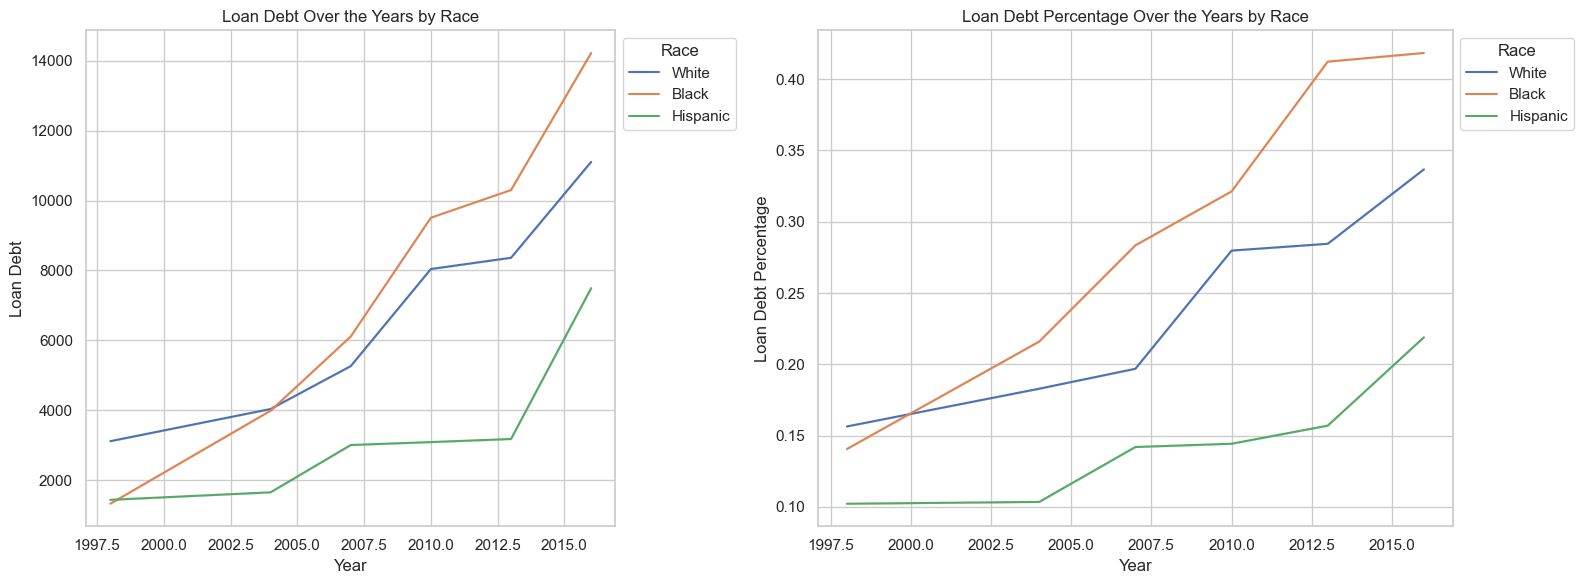

In [33]:
# Create subplots with more space between them
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.2]})

# Visualization 1: Loan Debt Over the Years
sns.lineplot(ax=axes[0], x='year', y='loan_debt', hue='race', data=merged_data)

# Move the legend outside the plot
axes[0].legend(title='Race', bbox_to_anchor=(1, 1))

axes[0].set_title('Loan Debt Over the Years by Race')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Loan Debt')

# Visualization 2: Loan Debt Percentage Over the Years
sns.lineplot(ax=axes[1], x='year', y='loan_debt_pct', hue='race', data=merged_data)

# Move the legend outside the plot
axes[1].legend(title='Race', bbox_to_anchor=(1, 1))

axes[1].set_title('Loan Debt Percentage Over the Years by Race')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Loan Debt Percentage')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Although the educational attainment levels has been decreasing throughout the years for all races, this shows how the student loan debt amount and the percentage of families that have student loan has been increasing steadily throughout the years. Notably the Black race group has the highest in amounts and percentage wise amongst all races. 

## Mean income trend over the years by race

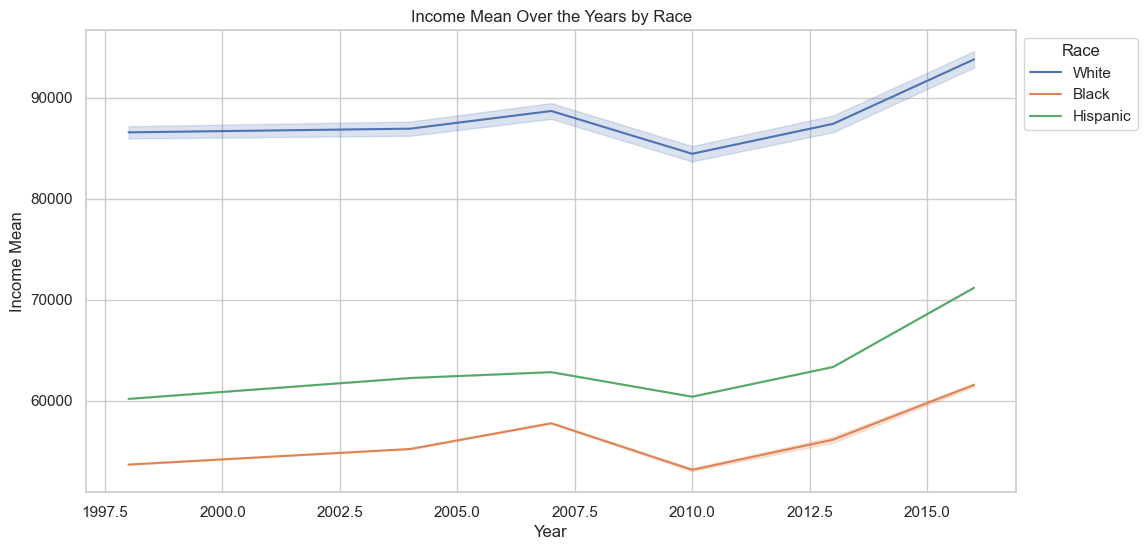

In [34]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualization: Income Mean Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='income_mean', hue='race', data=merged_data)

# Move the legend outside the plot
plt.legend(title='Race', bbox_to_anchor=(1, 1))

plt.title('Income Mean Over the Years by Race')
plt.xlabel('Year')
plt.ylabel('Income Mean')
plt.show()

Did the increasing student loan amount lead to higher income? We can see that the income mean for the white has always been significantly above the Black and Hispanic mean income. However we can observe a steady and consistent change in mean income throughout all races since 2010. This is most likely due to the quantitative easing that has been done by the federal reserve to combat the recession after the real estate crisis / recession in 2008/2009. Nonetheless, the increase in student loan debt seems to be have also increased the mean income for households for all races

## Relationship between student loan and income mean 

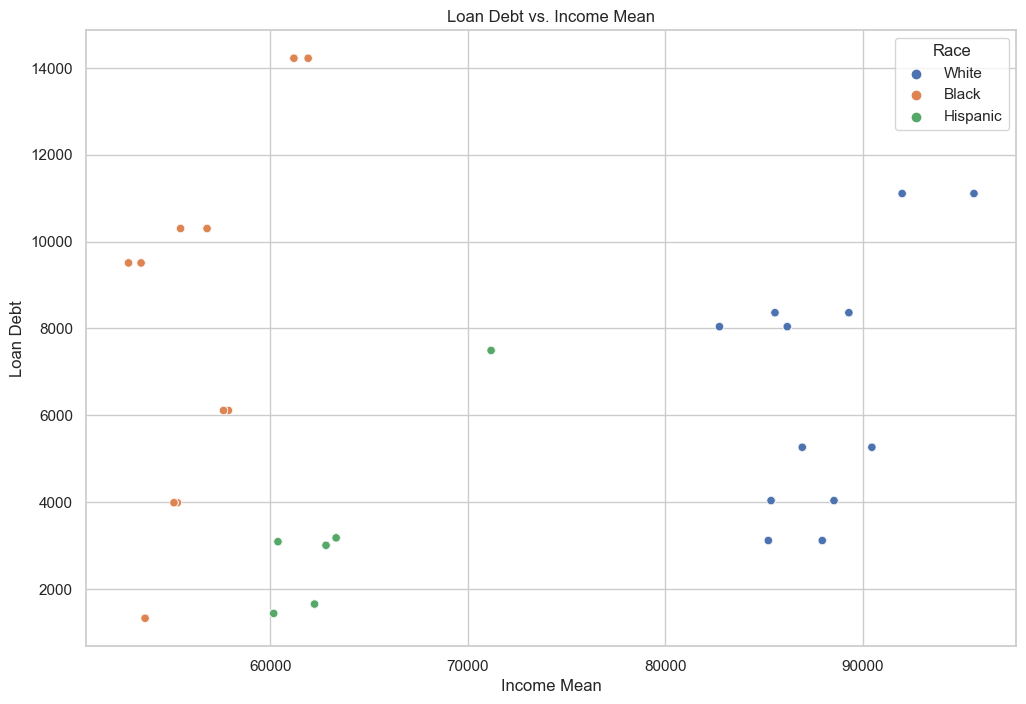

In [35]:
# Scatter plot for loan_debt vs. income_mean
plt.figure(figsize=(12, 8))
sns.scatterplot(x='income_mean', y='loan_debt', hue='race', data=merged_data)
plt.title('Loan Debt vs. Income Mean')
plt.xlabel('Income Mean')
plt.ylabel('Loan Debt')
plt.legend(title='Race', bbox_to_anchor=(1, 1))
plt.show()

Through this scatter plot we can see although the Black has the highest loan amount all of their income mean throughout all years is the lowest outside of just two years. On the other hand the whites have higher income than every race regardless of the student loan debt amount. It's also interesting to see how the hispanic does not pick up as much student loan compared to the other two races, most likely due to something about their culture or their their education stopping before student debt can accumulate. However, we can see that the second case is not the case as shown in the education graph above where the hispanics have a higher educationa attainment level compared to the black. 

## Homeownership rate throughout the years 

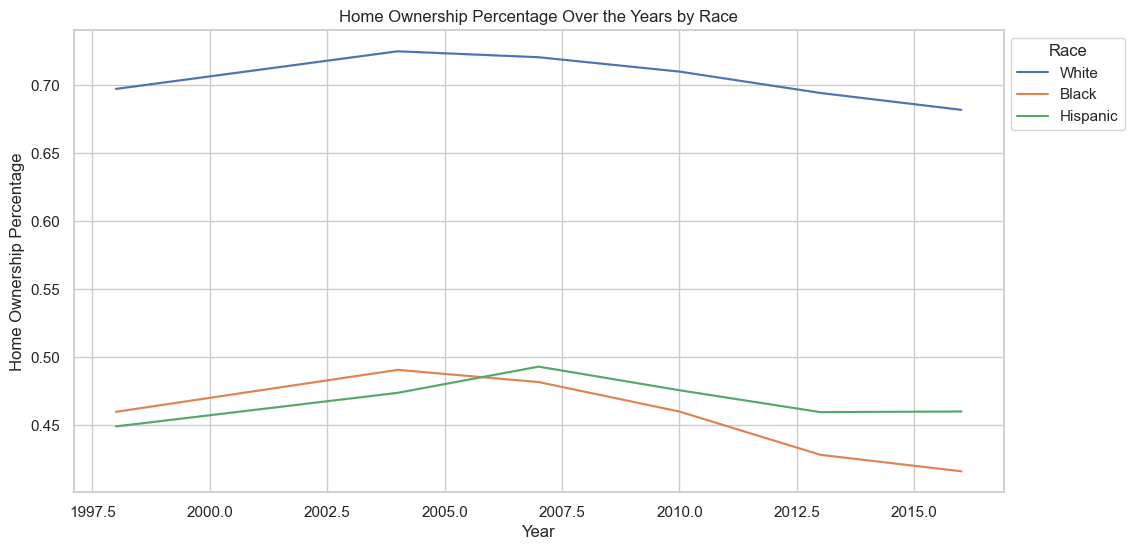

In [36]:
# Create a line plot for home_owner_pct over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='home_owner_pct', hue='race', data=merged_data)

# Move the legend outside the plot
plt.legend(title='Race', bbox_to_anchor=(1, 1))

plt.title('Home Ownership Percentage Over the Years by Race')
plt.xlabel('Year')
plt.ylabel('Home Ownership Percentage')

plt.show()

Although the increase in student loan resulted in increase in mean income for all races, did that also lead to increase in homeownership? (One of the most commonly bought big item purchase once people have enough money for it) From this graph we can actually see that the percentage of homeownership amongst all races has remained relatively flat throughout all the years. One point worth noting is the fact that the race with the highest student loan debt also had the lowest homeownership percentage. 

## Conclusion 

I initially hypothesized that educational attainment would be increasing, as a result, it would increase student debt and mean income while decreasing the homeownership percentage. However, it was surprising to find out that educational attainment has been dropping. The percentage of people that are in the labor force has shown a steady decrease in their education levels. Despite the lowered education level, student loan has been increasing, hinting that education has become more and more expensive and people are either unable to afford it, lowering their final education level, or having to go further in debt to secure their level of education. It did seem to increase their mean income after their education level but the pattern of everyone's income going up in the same pattern seems to imply that there are other factors at play in increasing their income rather than just education. I hypothesize that this has something to do with the inflation rate as it happens just after the quantitative easing of the federal reserve after the 2008 real estate crash. The results also highlight how the income gap, even for the mean income, exists amongst different races. Through this analysis, we can see how much the educated you are you are going to earn more however, with a great probability of you going into greater debt and not being able to purchase a home necessarily. 